In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score, f1_score, r2_score, confusion_matrix, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.calibration import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Obtención de los datos

* Utilizamos la función "read_csv" para importar el csv a Dataframe. Lo imprimimos para ver una primera visual de los datos con los que vamos a trabajar

* Podemos ver que los datos son componentes de vinos y cada uno de ellos presenta una calidad

In [5]:
df = pd.read_csv("archives/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Información general

* Lo primero que haremos sera pedirle al dataframe que nos muestre su información, las columnas que tiene, si tiene nulos y el tipo de dato que tiene en las columnas

* Como podemos observar todos los datos son float excepto la calidad, ya que esta es representada por numeros enteros. También vemos que no presenta ningún dato nulo por lo cual nos facilita mucho su limpieza 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Estudio de los Datos

* Con la siguiente función: El dataframe nos muestra la media, la desviacón estandar, los quartiles, el máximo valor, etc. 

* Esto nos sirve para detectar la presencia de outliers

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* Ahora mostraremos un histograma de todo el dataframe para observar si presenta relaciones entre datos o algún pico extraño.
    * Se pueden ver picos extraños como por ejemplo en fixed acidity

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

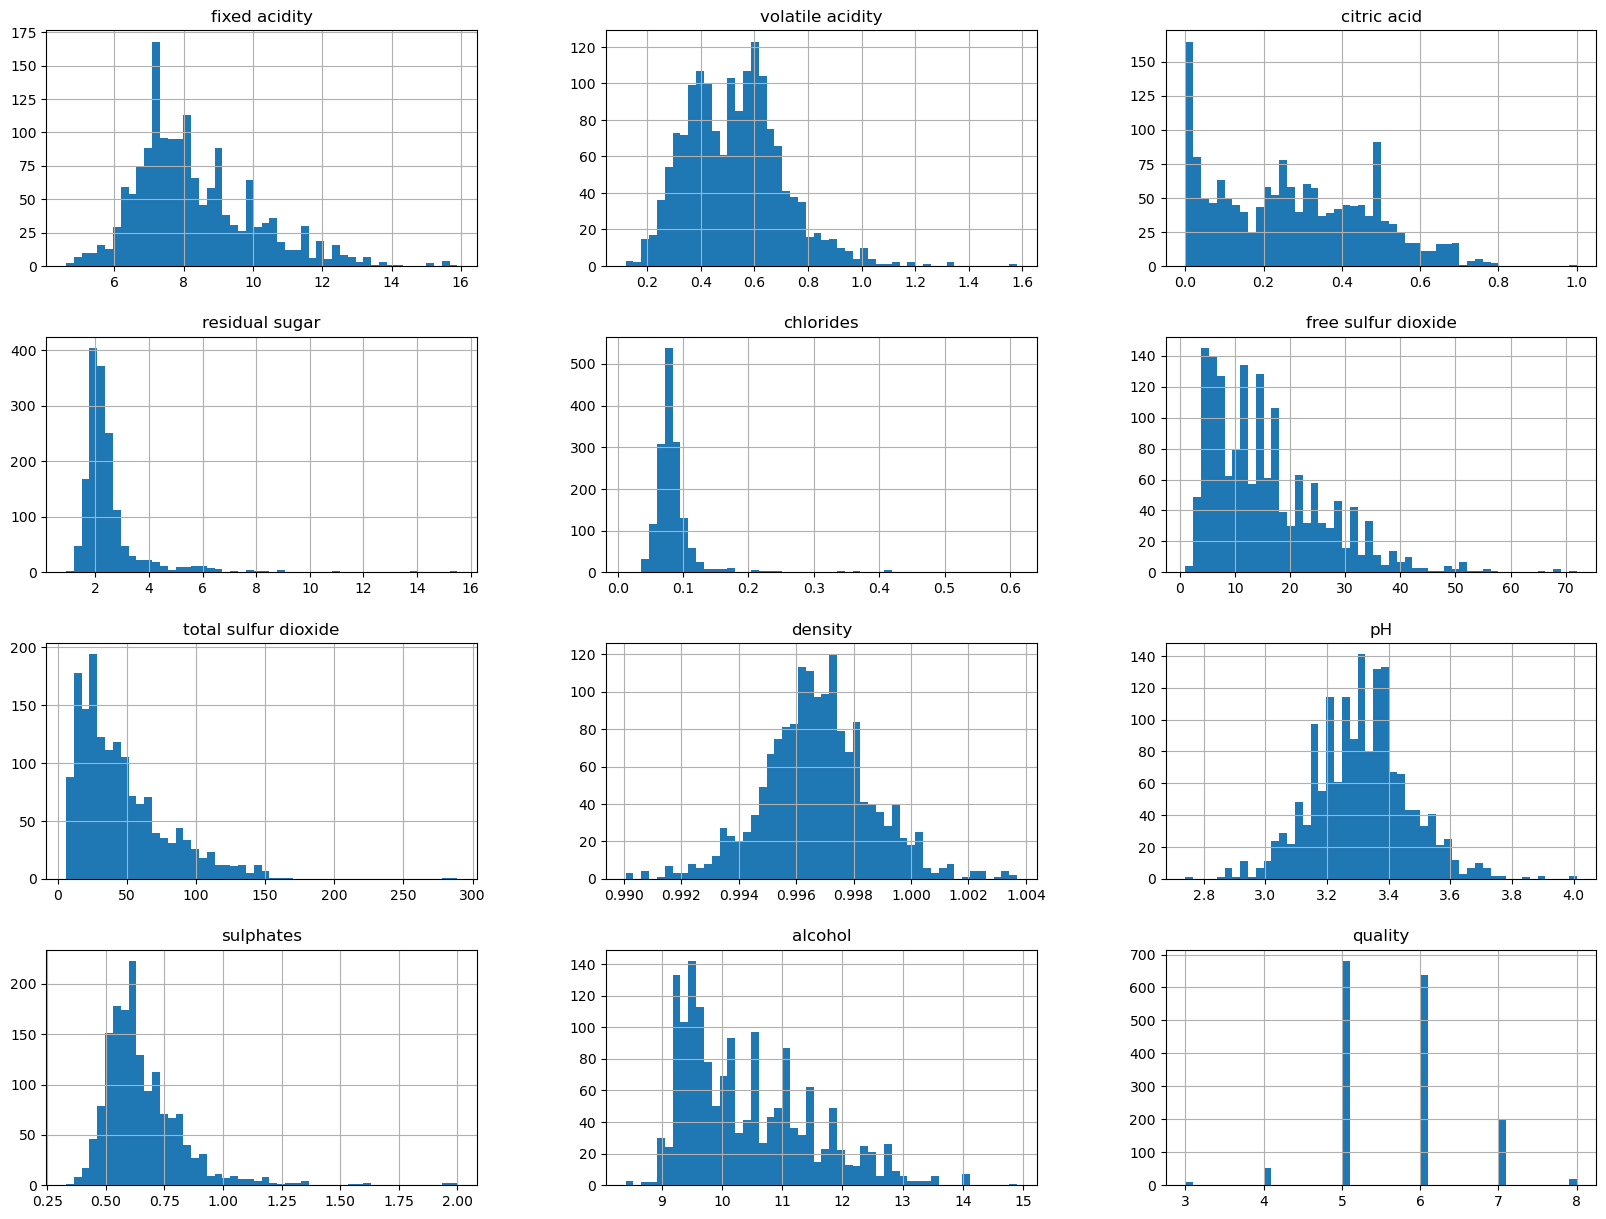

In [9]:
df.hist(figsize=(20,15),bins=50)

# Descubriendo y visualizando datos

## Un par de scatters con color

Lo primero que voy a realizar es un gráfico de tipo scatter con tres valores:
- Alcohol
- Acided [fixed acidity, citric acid, volatile acidity]
- Todo esto en base a la calidad del vino

<Axes: xlabel='alcohol', ylabel='citric acid'>

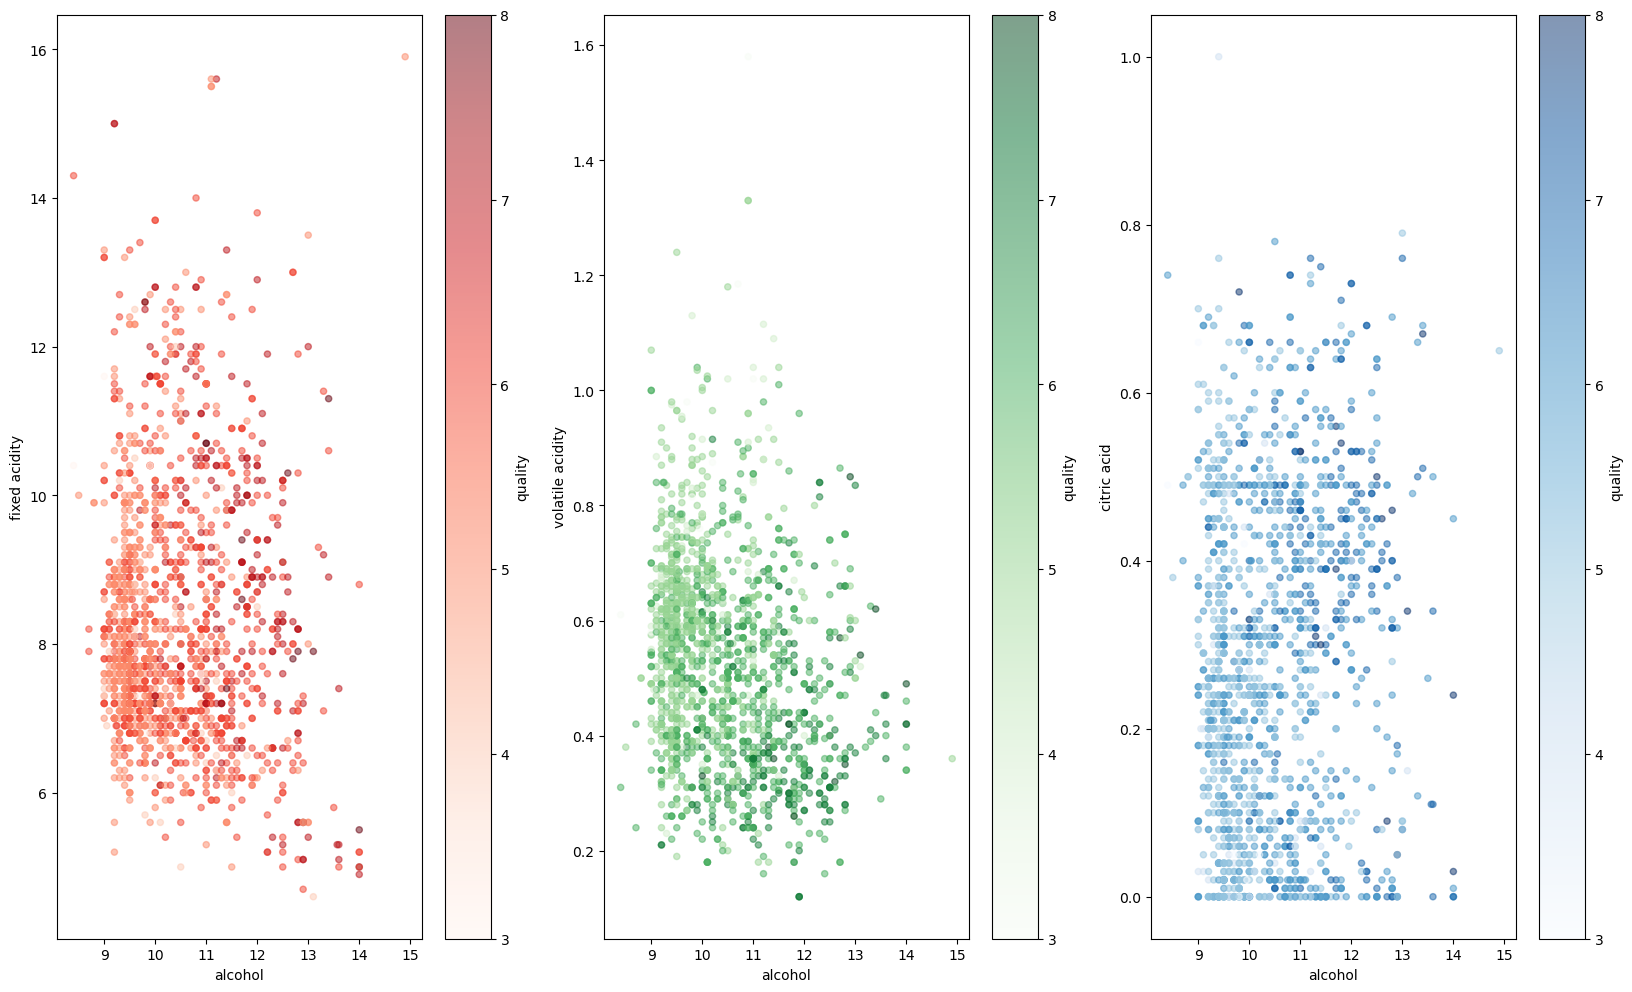

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 12))
df.plot(
    ax=axes[0],
    kind="scatter",
    x="alcohol",
    y="fixed acidity",
    alpha=0.5,
    c="quality",
    cmap= "Reds"
)
df.plot(
    ax=axes[1],
    kind="scatter",
    x="alcohol",
    y="volatile acidity",
    alpha=0.5,
    c="quality",
    cmap= "Greens"
)
df.plot(
    ax=axes[2],
    kind="scatter",
    x="alcohol",
    y="citric acid",
    alpha=0.5,
    c="quality",
    cmap= "Blues"
)

A simple vista podemos pensar que tiene tiene mas relación el "fixed acidity" pero fijandonos más a fondo, el volatil y el cítrico tienen valores más altos junto a contraposición del fijo.

### boxplots para cada columna, desglosada por calidad

- Con estos gráficos podremos ver:
    - Un primer acercamiento a la relación de cada columna con la calidad
    - La media y la mediana de los valores de cada columna
    - Ver como se distribuyen los valores en cada columna

In [11]:
def mostrar_cajas(dataframe, columna, axs, position):
    dataframe.boxplot(  column = columna, 
                        by = "quality",
                        notch = True,
                        ax = axs.flatten()[position],
                        patch_artist = True,
                        showmeans = True,
                        boxprops = dict(edgecolor="darkgreen",  facecolor="lightgreen", linewidth=2),
                        capprops = dict(color="darkgreen", linewidth=2), 
                        flierprops = dict(color="darkgreen", markerfacecolor="lightgreen", linestyle= "none", markeredgecolor="none", markersize=9),
                        medianprops = dict(color="darkgreen"),
                        whiskerprops = dict(color="darkgreen",linewidth=1),
                        )

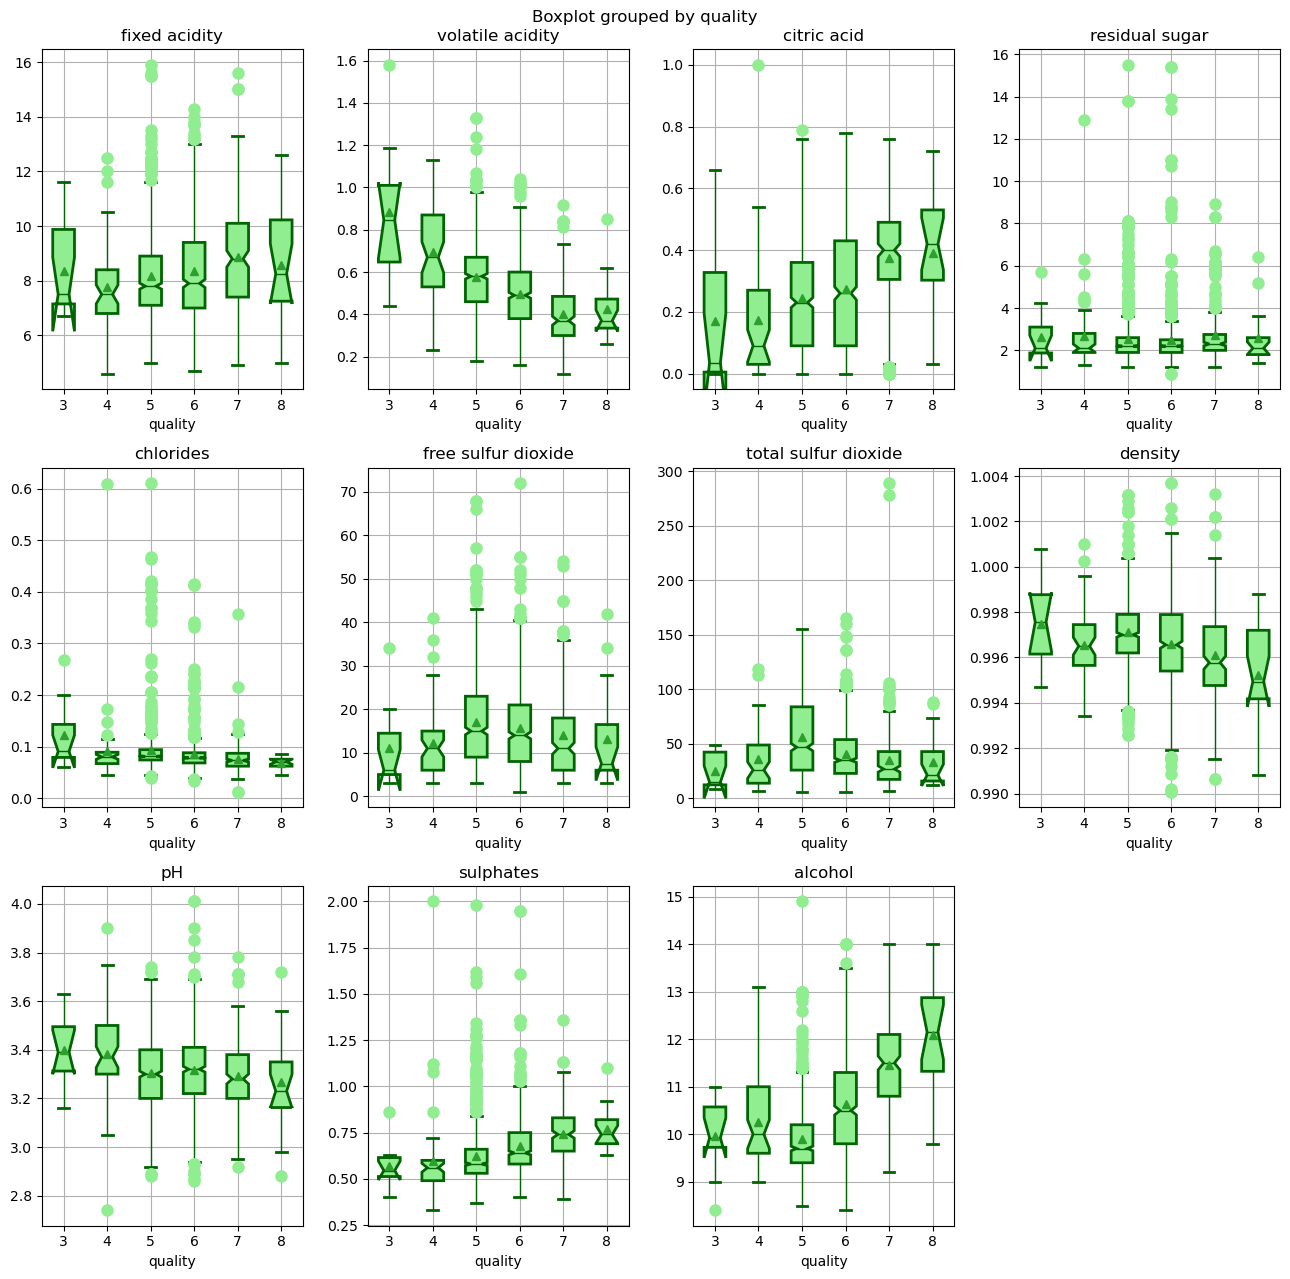

In [12]:
cols = list(df.columns)
cols.pop() # Elimino el index
fig, axes = plt.subplots(3,4)

pos = 0 # Para colocar las cajas uno al lado de la otra
for col in cols:
    mostrar_cajas(df, col, axes, pos)
    pos += 1

# De esta manera junto al flatten de la funcion mostrar_cajas, las pongo una seguida de la otra
fig.delaxes(axes[2,3])
fig.set_figheight(13)
fig.set_figwidth(13)
plt.tight_layout()

## matriz de correlacion y mapa de calor

- Realizamos un mapa de calor para luego poder seleccionar las distintas columnas que tienen relación y crear la matriz de correlación

- Al ser todos los valores numéricos es mucho mas sencillo crear el mapa de calor

- Yo aqui realizo un mapa de colo con distintas librerias para ver cual sería la mejor forma o la más facil de mostrar los datos

### Seaborn

In [13]:
# %conda install -c conda-forge seaborn -y

<Axes: >

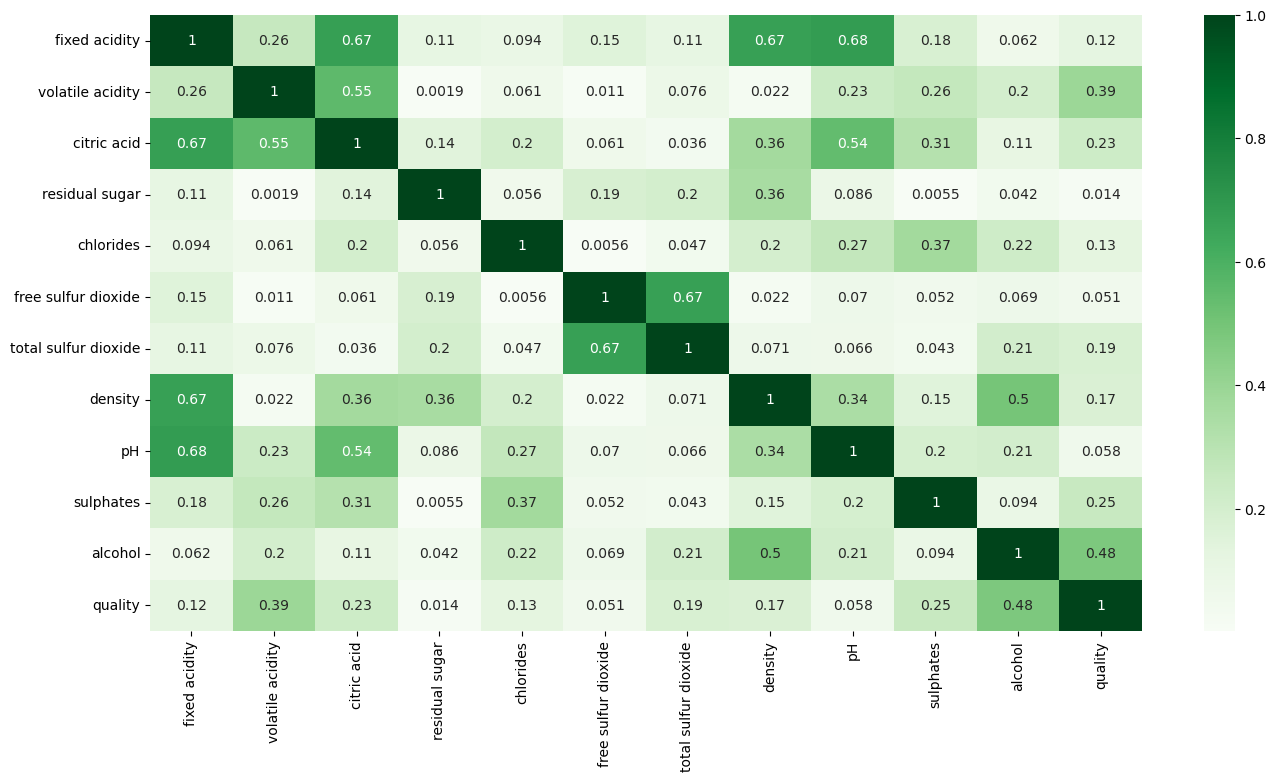

In [14]:
corr_matrix = df.select_dtypes('number').corr()

plt.figure(figsize=(16,8))
sns.heatmap(np.abs(corr_matrix), annot=True, cmap='Greens')

### Jinja2

In [15]:
# %conda install jinja2 -y

In [16]:
# Utilizando jinja2
corr_matrix = df.select_dtypes('number').corr()
corr_matrix.style.background_gradient().bar()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [17]:
corr_matrix.style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Utilizando Matplot

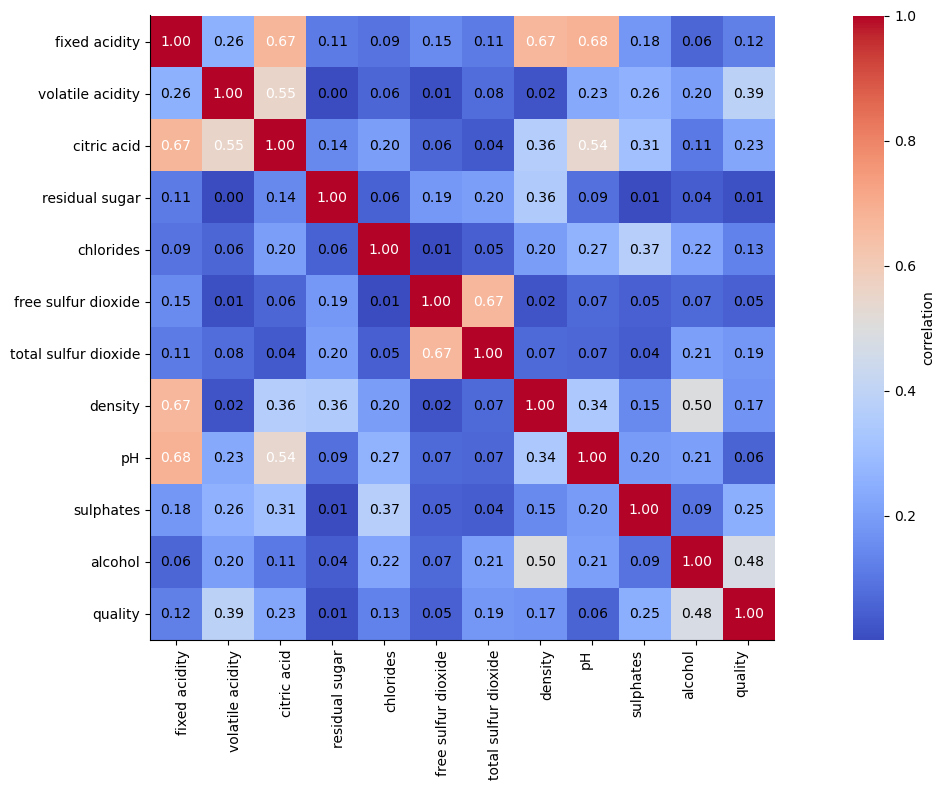

In [18]:
# Recojo en la matrix las columnas con un tipo numerico(float, int, etc)
corr_matrix = df.select_dtypes('number').corr() 

fig, axes = plt.subplots(figsize = (16,8))
text_colors = ("black", "white")
im = axes.imshow(np.abs(corr_matrix), cmap='coolwarm')
cbar = fig.colorbar(im, ax=axes, label="correlation")
cbar.outline.set_visible(False)

x = corr_matrix.columns
y = corr_matrix.index
for i in range(len(y)):
    for j in range(len(x)):
      value = np.abs(corr_matrix.iloc[i, j])
      text_color = text_colors[int(im.norm(value) > 0.5)] # color etiqueta
      axes.text(j, i, f"{value:.2f}" , color=text_color, va= "center" , ha= "center" )

# axes.set_xticks(np.arange(len(corr_matrix.columns)), labels = corr_matrix.columns)
# axes.set_yticks(np.arange(len(corr_matrix)), labels = corr_matrix.columns)

plt.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
axes.set_xticks(range(len(x)))
axes.set_xticklabels(x, rotation=90) # Nombre de las x en vertical
axes.set_yticks(range(len(y)))
axes.set_yticklabels(y) # Nombre de las y en horizontal
axes.spines["right"].set_visible(False) # ocultar borde derecho
axes.spines["top"].set_visible(False) # ocultar borde superior
fig.tight_layout()

En base al mapa de calor, podemos ver que en base a la calidad, las columnas más relacionadas son:

- ["fixed acidity", "volatile acidity", "citric acid", "chlorides", "total sulfur dioxide", "density", "sulphates", "alcohol"]

El azucar residual tiene un valor muy bajo así que podríamos llegar a eliminarlo para crear la matriz de correrlación

## scatter cruzado de las columnas más prometedoras

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='volatile acidity'>,
        <Axes: xlabel='chlorides', ylabel

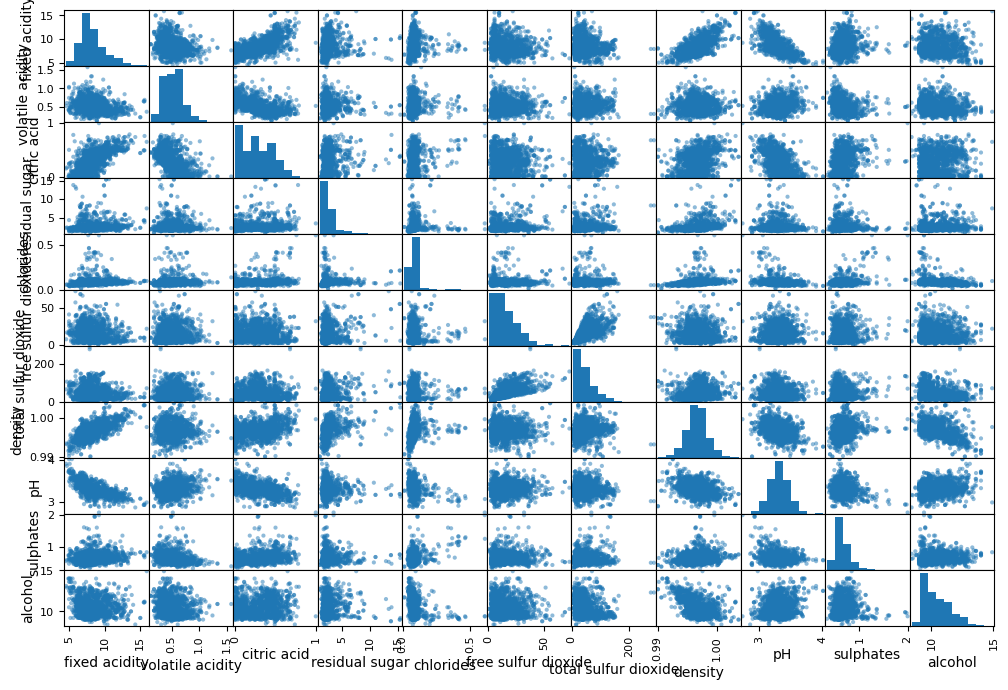

In [19]:
atributes = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"] # Todos
# atributes = ["fixed acidity", "volatile acidity", "citric acid", "chlorides", "total sulfur dioxide", "density", "sulphates", "alcohol"] # Valores altos abd 0.1
# atributes = ["volatile acidity", "citric acid", "total sulfur dioxide", "density", "sulphates", "alcohol"] # Valores altos abd +0.15
# atributes = ["volatile acidity", "citric acid", "sulphates", "alcohol"] # Valores altos abs +0.2
# atributes = ["fixed acidity", "citric acid", "sulphates", "alcohol"] # Valores altos positivos
scatter_matrix(df[atributes], figsize=(12,8))

# Modelo

## Preparando los datos para el modelo

In [20]:
# Transformarmos Y ya que es multiclase
df = df[(np.abs(stats.zscore(df)) < 4).all(axis=1)] # Eliminamos outliers

le=LabelEncoder()
X=df.drop('quality',axis=1)
Y=le.fit_transform(df['quality'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)

x_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
82,7.4,0.50,0.47,2.0,0.086,21.0,73.0,0.99700,3.36,0.57,9.1
984,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
1136,10.4,0.52,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4


## Seleccionar los modelos y entrenarlos

In [21]:
lscores = []

def result(model, model_reg):
    predicciones = model_reg.predict(x_test)
    y_train_pred = cross_val_predict(model_reg, x_train, y_train, cv=3)
    lscores.append({
        "name" : model,
        "f1" : round(f1_score(y_train, y_train_pred, average="micro"), 4),
        "r2" : round(r2_score(y_test, predicciones), 4),
        "accuracy" : round(accuracy_score(y_train, y_train_pred), 4),
        "precission" : round(precision_score(y_train, y_train_pred, average="micro"), 4),
        "recall" : round(recall_score(y_train, y_train_pred, average="micro"), 4),
        "error_mse" : np.sqrt(mean_squared_error(y_test, predicciones)),
        "model_score" : cross_val_score(model_reg, x_train, y_train, cv=3, scoring="accuracy"),
        "error_mae" : mean_absolute_error(y_test, predicciones)
    })


def acc_rec_graph(models):
    plt.figure(figsize=(10,8))
    for name, model in models.items():
        try:
            y_scores = cross_val_predict(model, x_train, y_train, cv=3, method="decision_function")
            y_scores = y_scores[:,1]
            precisions, recalls, _ = precision_recall_curve(y_train, y_scores, pos_label=1, drop_intermediate=True)
            plt.plot(recalls, precisions, label=name, linewidth=2)
        except AttributeError:
            print(f"{name} no tiene el metodo decision_function")

    plt.title("Precision/recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()

def roc_graph(models):
    plt.figure(figsize=(10,8))
    for i, (name, model) in enumerate(models.items()):
        y_scores = cross_val_predict(model, x_train, y_train, cv=3, method="predict_proba")
        lscores[i]["roc_auc_score"] = round(roc_auc_score(y_train, y_scores, multi_class="ovr"), 4)
        y_scores = y_scores[:,1]
        fpr, tpr, _ = roc_curve(y_train, y_scores, pos_label=1, drop_intermediate=True)
        plt.plot(fpr, tpr, label=name)
    
    plt.title("ROC curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()

## Entrenamiento

In [22]:
models = {
    "SGDClassifier": SGDClassifier("log_loss"),
    "Logistic Regression": LogisticRegression(solver="lbfgs", max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(), 
    "Naive Bayes": GaussianNB(),       
    "MLP Neural Network": MLPClassifier(max_iter=1000) 
}

In [23]:
for name, model in models.items():
    model.fit(x_train, y_train)
    result(name, model)

## Precisión recall gráfica

Decision Tree----'DecisionTreeClassifier' object has no attribute 'decision_function'
Random Forest----'RandomForestClassifier' object has no attribute 'decision_function'
KNN----'KNeighborsClassifier' object has no attribute 'decision_function'
XGBoost----'XGBClassifier' object has no attribute 'decision_function'
Naive Bayes----'GaussianNB' object has no attribute 'decision_function'
MLP Neural Network----'MLPClassifier' object has no attribute 'decision_function'


<Figure size 1000x800 with 0 Axes>

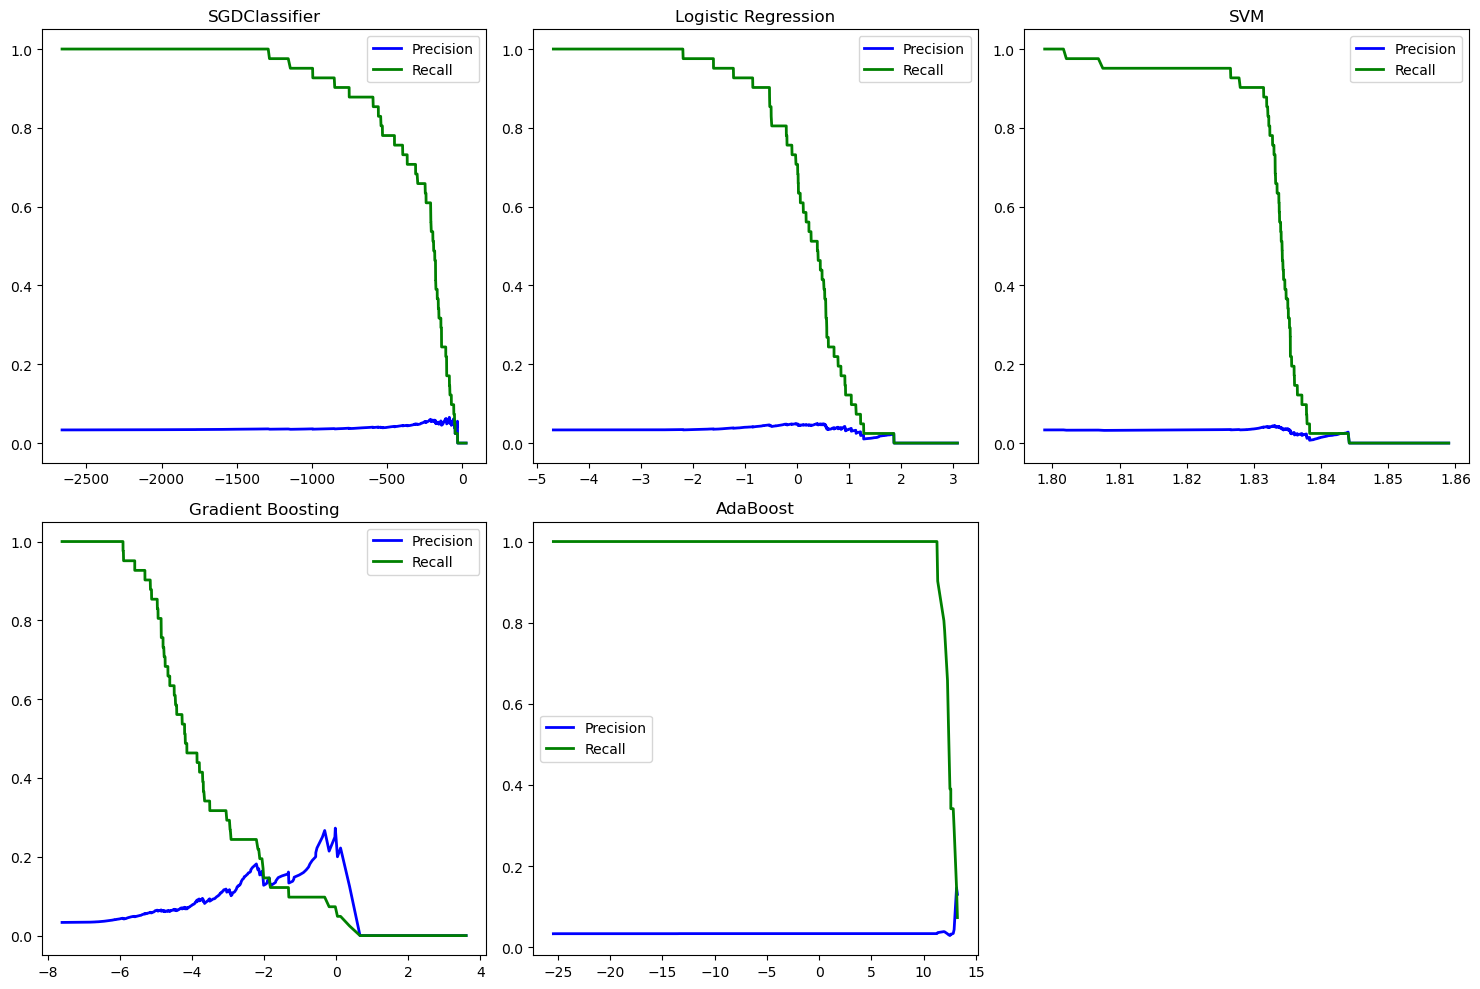

In [24]:
# TODO generalizacion del metodo

def prerec_curve(models):
    plt.figure(figsize=(10,8))
    fig, axes = plt.subplots(2, 3) # se que solo 5 van a funcionar por eso el TODO
    
    pos=0
    for name, model in models.items():
        try:
            y_scores = cross_val_predict(model, x_train, y_train, cv=3,
                             method="decision_function")
            y_scores = y_scores[:,1]
            precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores, pos_label=1)

            axes.flatten()[pos].plot(thresholds, precisions[:-1], "b", label="Precision", linewidth=2)
            axes.flatten()[pos].plot(thresholds, recalls[:-1], "g", label="Recall", linewidth=2)
            axes.flatten()[pos].set_title(name)
            axes.flatten()[pos].legend()
            pos+=1
        except Exception as err:
            print(f"{name}----{err}")
           
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.tight_layout()
    axes.flatten()[-1].set_axis_off()

prerec_curve(models)

## Precisión/Recall gráfica

Decision Tree no tiene el metodo decision_function
Random Forest no tiene el metodo decision_function
KNN no tiene el metodo decision_function
XGBoost no tiene el metodo decision_function
Naive Bayes no tiene el metodo decision_function
MLP Neural Network no tiene el metodo decision_function


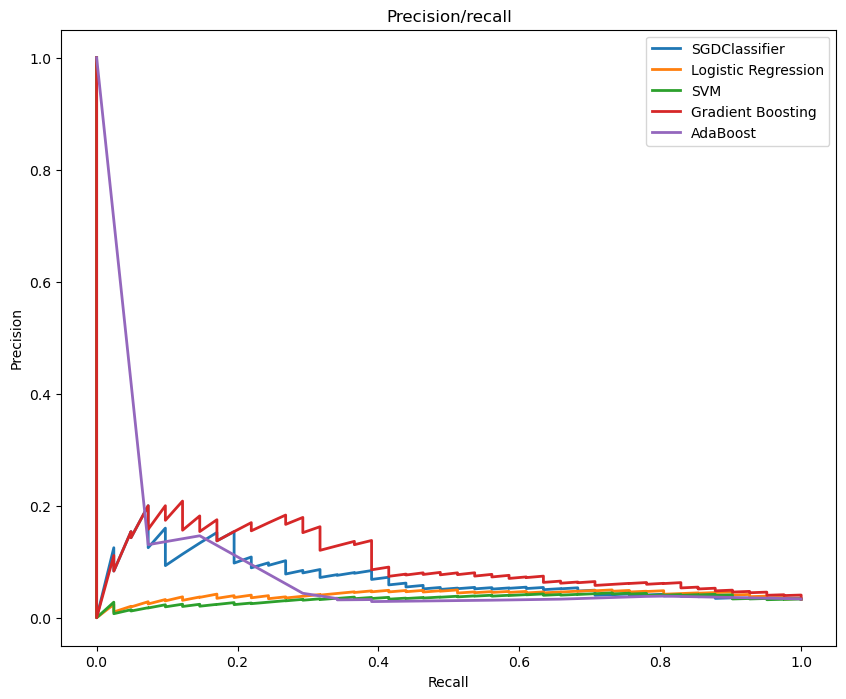

In [25]:
acc_rec_graph(models)

## Roc curve gráfica

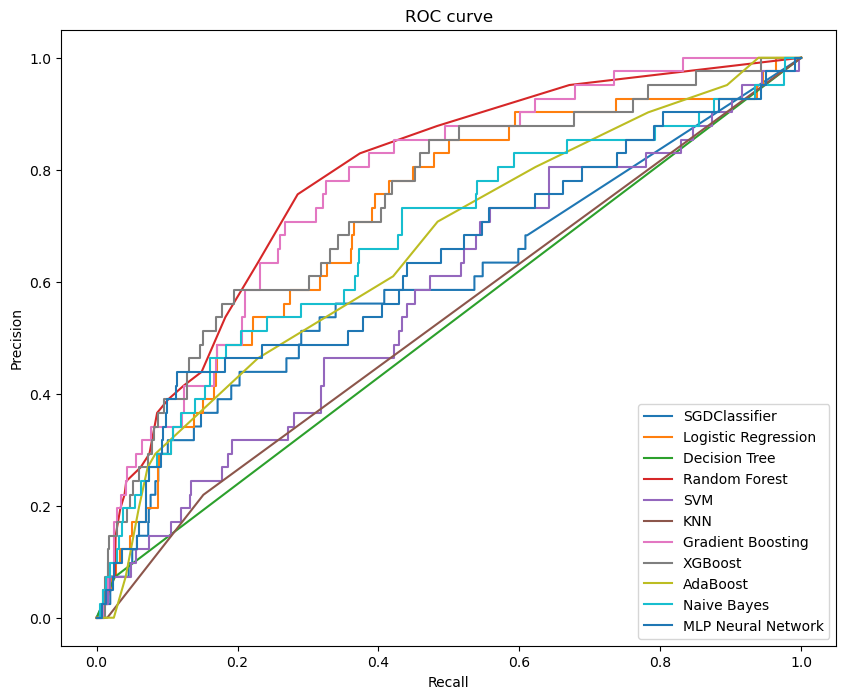

In [26]:
roc_graph(models)

# Resultado

In [27]:
df = pd.DataFrame(lscores)
df

,name,f1,r2,accuracy,precission,recall,error_mse,model_score,error_mae,roc_auc_score
0,SGDClassifier,0.4768,-0.7714,0.4768,0.4768,0.4768,1.070562,"[0.40487804878048783, 0.3926829268292683, 0.13...",0.737013,0.6390
1,Logistic Regression,0.5989,0.2021,0.5989,0.5989,0.5989,0.718494,"[0.6170731707317073, 0.5902439024390244, 0.589...",0.412338,0.7749
2,Decision Tree,0.5883,0.0415,0.5883,0.5883,0.5883,0.787483,"[0.5634146341463414, 0.6219512195121951, 0.589...",0.457792,0.6187
3,Random Forest,0.6672,0.3777,0.6672,0.6672,0.6672,0.634506,"[0.6926829268292682, 0.6707317073170732, 0.687...",0.337662,0.8326
4,SVM,0.4988,-0.0589,0.4988,0.4988,0.4988,0.827686,"[0.48292682926829267, 0.5073170731707317, 0.50...",0.548701,0.6870
5,KNN,0.4980,-0.1492,0.4980,0.4980,0.4980,0.862268,"[0.5195121951219512, 0.4902439024390244, 0.484...",0.561688,0.6296
6,Gradient Boosting,0.6452,0.3526,0.6452,0.6452,0.6452,0.647172,"[0.6487804878048781, 0.6658536585365854, 0.647...",0.347403,0.7456
7,XGBoost,0.6574,0.2422,0.6574,0.6574,0.6574,0.700186,"[0.6634146341463415, 0.6609756097560976, 0.647...",0.379870,0.8234
8,AdaBoost,0.5460,0.0415,0.5460,0.5460,0.5460,0.787483,"[0.5658536585365853, 0.5195121951219512, 0.552...",0.509740,0.6801
9,Naive Bayes,0.5517,-0.0087,0.5517,0.5517,0.5517,0.807835,"[0.5829268292682926, 0.5146341463414634, 0.557...",0.490260,0.7658


In [28]:
for name, model in models.items():
    predicciones = model.predict(x_test)

    errores=0
    for i, prediccion in enumerate(predicciones):
        if prediccion != list(y_test)[i]:
            errores+=1
    print(f"{name} FALLA EN: {errores} de {len(x_test)} con: {round(errores/len(x_test)*100, 2)}% de errores")

SGDClassifier FALLA EN: 173 de 308 tiene un 56.17% de errores
Logistic Regression FALLA EN: 113 de 308 tiene un 36.69% de errores
Decision Tree FALLA EN: 118 de 308 tiene un 38.31% de errores
Random Forest FALLA EN: 95 de 308 tiene un 30.84% de errores
SVM FALLA EN: 151 de 308 tiene un 49.03% de errores
KNN FALLA EN: 148 de 308 tiene un 48.05% de errores
Gradient Boosting FALLA EN: 97 de 308 tiene un 31.49% de errores
XGBoost FALLA EN: 102 de 308 tiene un 33.12% de errores
AdaBoost FALLA EN: 140 de 308 tiene un 45.45% de errores
Naive Bayes FALLA EN: 130 de 308 tiene un 42.21% de errores
MLP Neural Network FALLA EN: 106 de 308 tiene un 34.42% de errores
